## multi task learning
- basic ideas from [this page](http://yanjoy.win/2017/03/15/tensorflow-multitask/)
- when multi-task learning make sense
    - Trianing on a set of tasks that could benefit from having shared lower-level features.
    - Usually : Amount of data you have for each task is quite similar.
    - Can train a big enough neural network to do well on all the tasks.

In [21]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
# input data x
X = tf.placeholder(tf.float32, shape=(10,10), name="X")
# labels of two different tasks
Y1 = tf.placeholder(tf.float32, shape=(10,20), name="Y1")
Y2 = tf.placeholder(tf.float32, shape=(10,20), name="Y2")

# initial random values of weights
initial_shared_layer_weights = np.random.rand(10,20)
initial_Y1_layer_weights = np.random.rand(20,20)
initial_Y2_layer_weights = np.random.rand(20,20)

# trainable variables : weights
shared_layer_weights = tf.Variable(initial_shared_layer_weights, name="shared_W", dtype="float32")
Y1_layer_weights = tf.Variable(initial_Y1_layer_weights, name="Y1_W", dtype="float32")
Y2_layer_weights = tf.Variable(initial_Y2_layer_weights, name="Y2_W", dtype="float32")

### Train_alternately

![train_alternately](/notebooks/KDD_Cup_2018/multi_task_learning_demo/train_alternately.png)

In [7]:
# computation graph
shared_layer = tf.nn.relu(tf.matmul(X, shared_layer_weights))
Y1_layer = tf.nn.relu(tf.matmul(shared_layer, Y1_layer_weights))
Y2_layer = tf.nn.relu(tf.matmul(shared_layer, Y2_layer_weights))
Y1_Loss = tf.nn.l2_loss(Y1 - Y1_layer)
Y2_Loss = tf.nn.l2_loss(Y2 - Y2_layer)

In [34]:
# optimizer
Y1_op = tf.train.AdamOptimizer().minimize(Y1_Loss)
Y2_op = tf.train.AdamOptimizer().minimize(Y2_Loss)

# training
Y1_losses = []
Y2_losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        if np.random.rand() < 0.5:
            _, Y1_loss = sess.run([Y1_op, Y1_Loss],
                                 feed_dict={X:np.random.rand(10,10)*10, Y1:np.random.rand(10,20)*10, Y2:np.random.rand(10,20)*10})
            print(Y1_loss)
            Y1_losses.append(Y1_loss)
            
        else :
            _, Y2_loss = sess.run([Y2_op, Y2_Loss],
                                 feed_dict={X:np.random.rand(10,10)*10, Y1:np.random.rand(10,20)*10, Y2:np.random.rand(10,20)*10})
            print(Y2_loss)
            Y2_losses.append(Y2_loss)

7.25525e+06
4.55076e+06
5.51718e+06
5.16228e+06
6.20849e+06
5.3502e+06
7.006e+06
5.39009e+06
6.66534e+06
4.48599e+06
6.49579e+06
5.98424e+06
4.84788e+06
5.91573e+06
6.50049e+06
5.79424e+06
4.86953e+06
5.95515e+06
5.365e+06
5.54657e+06
5.1746e+06
5.44236e+06
5.37807e+06
6.54248e+06
4.52442e+06
5.10141e+06
5.16841e+06
5.4368e+06
5.94729e+06
5.39271e+06
5.6562e+06
4.88515e+06
4.61849e+06
4.06065e+06
5.54398e+06
4.76189e+06
5.36147e+06
4.42858e+06
4.2689e+06
4.97568e+06
4.51296e+06
4.05124e+06
4.71141e+06
5.08946e+06
4.721e+06
3.80585e+06
5.59416e+06
4.69184e+06
4.36049e+06
4.95839e+06
3.22492e+06
3.70078e+06
4.71819e+06
4.22359e+06
4.91424e+06
4.43831e+06
3.69427e+06
4.22577e+06
3.93801e+06
4.24899e+06
4.75987e+06
4.01312e+06
3.76864e+06
3.30442e+06
3.69198e+06
3.83859e+06
3.80352e+06
3.05781e+06
3.34669e+06
3.79088e+06
3.34068e+06
4.89153e+06
4.03522e+06
4.75926e+06
4.00804e+06
3.39061e+06
4.24564e+06
2.94796e+06
2.85111e+06
3.95384e+06
2.43949e+06
2.20132e+06
3.03669e+06
2.85864e+06
3.9

62262.9
41898.4
74536.8
69842.3
58737.0
73244.0
53842.5
54100.2
100008.0
67487.8
75780.8
58989.2
60520.3
85400.9
71989.3
71558.5
58550.8
58466.1
59486.0
63461.1
35132.1
73486.9
47898.7
50063.5
48721.2
57344.5
64557.3
43423.3
62026.4
58153.4
59262.6
68445.0
83993.3
50535.2
52201.8
48912.0
50191.2
76312.4
69862.6
52566.3
44743.3
57619.8
63043.3
46595.6
42327.9
63959.2
61488.2
58891.6
88163.4
47800.8
77125.3
66620.0
39536.2
49152.1
70115.8
43768.5
50325.5
57198.0
44168.0
48595.4
59501.2
65650.2
63259.1
52327.8
47325.3
42046.9
65379.4
57184.2
39765.1
58343.8
35657.3
37940.8
36597.1
56800.3
64703.9
57527.7
69590.4
67438.7
51795.8
46796.2
53697.0
41226.8
58824.3
60162.0
55725.3
42161.8
45023.3
41956.0
43833.1
62604.5
64706.8
66687.0
50530.6
43865.8
40604.3
34170.9
32962.2
60170.8
38765.8
45738.7
40401.7
34803.9
28191.5
43571.8
38312.5
63025.3
40960.8
80842.6
57363.1
38724.9
60060.1
30260.9
40092.0
25535.3
43844.4
36186.6
57947.8
46798.9
55541.3
46357.6
63419.6
32983.3
35451.1
60417.0
46617.9

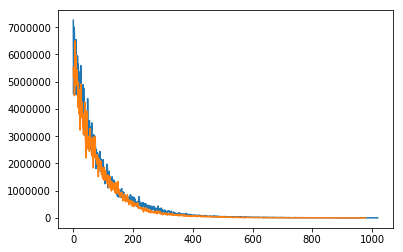

In [35]:
plt.plot(Y1_losses);
plt.plot(Y2_losses);

### Train_jointly

![train_jointly](/notebooks/KDD_Cup_2018/multi_task_learning_demo/train_jointly.png)

In [26]:
# computation graph
shared_layer = tf.nn.relu(tf.matmul(X, shared_layer_weights))
Y1_layer = tf.nn.relu(tf.matmul(shared_layer, Y1_layer_weights))
Y2_layer = tf.nn.relu(tf.matmul(shared_layer, Y2_layer_weights))
Y1_Loss = tf.nn.l2_loss(Y1 - Y1_layer)
Y2_Loss = tf.nn.l2_loss(Y2 - Y2_layer)
Joint_Loss = Y1_Loss + Y2_Loss

In [36]:
# optimizer
Optimizer = tf.train.AdamOptimizer().minimize(Joint_Loss)

# training
Joint_losses = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        _, Joint_loss = sess.run([Optimizer, Joint_Loss],
                             feed_dict={X:np.random.rand(10,10)*10, Y1:np.random.rand(10,20)*10, Y2:np.random.rand(10,20)*10})
        print(Joint_loss)
        Joint_losses.append(Joint_loss)

9.76031e+06
1.1993e+07
1.12193e+07
1.12301e+07
1.32577e+07
1.17454e+07
1.22329e+07
1.26821e+07
8.61064e+06
1.31348e+07
1.09841e+07
1.31368e+07
1.09344e+07
1.0376e+07
1.11308e+07
1.05125e+07
9.62123e+06
9.74311e+06
1.05857e+07
9.77153e+06
1.0736e+07
1.03541e+07
1.00649e+07
1.01897e+07
8.96582e+06
1.07428e+07
9.58142e+06
9.38307e+06
1.07963e+07
9.26688e+06
1.03725e+07
7.97407e+06
9.41925e+06
7.93933e+06
9.08049e+06
9.28851e+06
9.31149e+06
8.22072e+06
8.13686e+06
8.40077e+06
9.63046e+06
9.27888e+06
7.63966e+06
9.23884e+06
7.32631e+06
9.20761e+06
9.35416e+06
7.49547e+06
6.84018e+06
8.53122e+06
9.43329e+06
8.01826e+06
7.54137e+06
8.33576e+06
7.18774e+06
6.77747e+06
8.73153e+06
5.05842e+06
6.91232e+06
7.69226e+06
8.87319e+06
7.79053e+06
6.30097e+06
8.282e+06
6.88382e+06
6.27463e+06
6.83415e+06
7.43254e+06
5.90605e+06
6.59554e+06
7.33451e+06
7.75613e+06
7.31041e+06
6.63106e+06
7.87207e+06
6.88811e+06
5.12023e+06
5.44053e+06
7.13582e+06
6.59301e+06
6.21293e+06
6.47569e+06
6.1129e+06
6.06381e+0

128948.0
140644.0
102545.0
129709.0
83704.6
110863.0
82347.0
117887.0
128985.0
113153.0
79847.1
105127.0
116677.0
126132.0
90953.2
96561.5
90165.0
97251.9
97211.4
104689.0
94361.4
98391.2
74165.6
106319.0
102279.0
113672.0
128406.0
89296.0
99659.7
110973.0
123445.0
100191.0
75726.6
102271.0
122084.0
97359.4
102811.0
109597.0
94073.2
94206.0
120443.0
79883.9
69759.8
79968.1
89248.3
84509.0
111294.0
98656.3
89897.9
110385.0
80275.8
105224.0
74351.3
90060.1
88984.0
114494.0
67687.7
91296.0
113750.0
73716.8
78138.8
92360.3
63965.8
80719.7
81810.2
88335.0
83316.9
86781.2
94747.3
107486.0
86730.7
75734.3
83334.1
89265.3
90174.5
100877.0
84156.7
77512.5
97695.0
92599.5
105370.0
63286.1
80052.4
81040.8
81334.3
53194.7
68814.6
96595.5
79235.0
85879.8
60944.3
89391.2
61594.4
98746.0
90832.4
85463.9
79405.6
100879.0
103136.0
65520.1
78719.5
90169.2
96307.1
60247.4
64301.5
89297.9
73241.5
83726.3
75754.5
66470.4
90762.7
83186.2
91225.5
48102.3
88295.4
90125.7
65292.8
109978.0
50124.4
52413.8
59297

7821.1
7877.7
6286.24
6204.31
5753.57
6689.22
6207.93
6154.4
6309.64
5393.0
6918.67
6142.32
4897.17
5607.36
6941.78
5384.9
6419.65
5914.33
5107.22
5518.32
5428.65
6294.99
7920.64
6002.57
6329.02
5777.73
6889.12
5464.1
6138.57


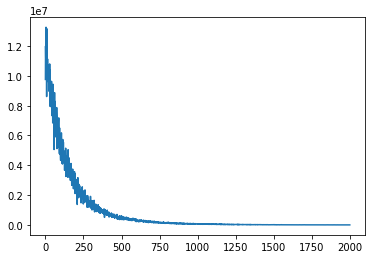

In [38]:
plt.plot(Joint_losses);